In [4]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


In [5]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [6]:
df.columns

Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [7]:
df.isnull().sum()

titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [9]:
# nos quedamos con las columnas que nos interesan
#dfcolumnas_ciudad = df[['ciudad', 'escuelascercanas', 'centroscomercialescercanos', 'precio']]
#dfcolumnas_ciudad_nonulas = dfcolumnas_ciudad.dropna(subset=['ciudad'])
#dfcolumnas_ciudad_nonulas.info()
#dfcolumnas_ciudad_nonulas.isnull().any()

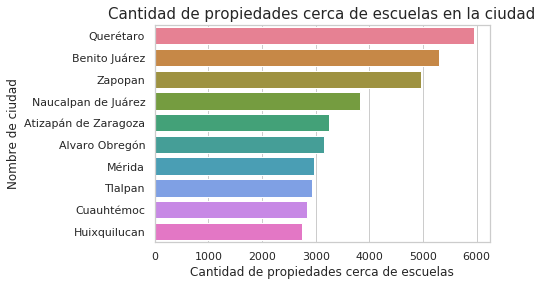

In [10]:
dfagrupadas_ciudad = df.groupby('ciudad').agg({'escuelascercanas':'sum'}).sort_values(by = ['escuelascercanas'], ascending = False)
dfagrupadas_ciudad.reset_index(inplace=True)
dftop10_ciudad = dfagrupadas_ciudad.head(10)

g = sns.barplot(x=dftop10_ciudad.escuelascercanas, y=dftop10_ciudad.ciudad, palette=sns.color_palette("husl", 10))
g.set_title("Cantidad de propiedades cerca de escuelas en la ciudad", fontsize=15)
g.set_xlabel("Cantidad de propiedades cerca de escuelas", fontsize=12)
g.set_ylabel("Nombre de ciudad", fontsize=12);

In [11]:
dfagrupadas_ciudad = df.groupby('ciudad').agg({'escuelascercanas':'sum'}).sort_values(by = ['escuelascercanas'], ascending = True)
dfagrupadas_ciudad.reset_index(inplace=True)
dftop4 = dfagrupadas_ciudad.head(10)

#no tiene mucho sentido, hay 292 ciudades "sin escuelas", no creo que sirva mostrarlo

#g = sns.barplot(x=dftop4_ciudad.ciudad, y=dftop4_ciudad.escuelascercanas, palette=sns.color_palette("husl", 8))
#g.set_title("Cantidad de escuelas en la ciudad", fontsize=15)
#g.set_xlabel("Nombre de ciudad", fontsize=12)
#g.set_ylabel("Cantidad de escuelas", fontsize=12);

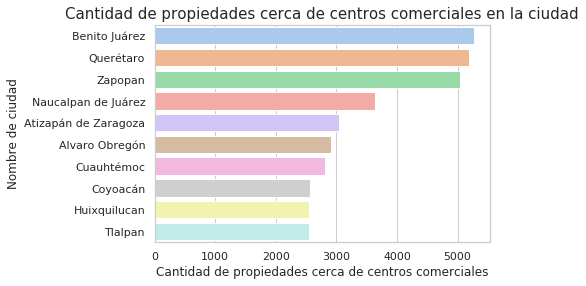

In [12]:
dfagrupadas_ciudad = df.groupby('ciudad').agg({'centroscomercialescercanos':'sum'}).sort_values(by = ['centroscomercialescercanos'], ascending = False)
dfagrupadas_ciudad.reset_index(inplace=True)
dftop10_ciudad = dfagrupadas_ciudad.head(10)

g = sns.barplot(x=dftop10_ciudad.centroscomercialescercanos, y=dftop10_ciudad.ciudad, palette=sns.color_palette("pastel", 10))
g.set_title("Cantidad de propiedades cerca de centros comerciales en la ciudad", fontsize=15)
g.set_xlabel("Cantidad de propiedades cerca de centros comerciales", fontsize=12)
g.set_ylabel("Nombre de ciudad", fontsize=12);

In [13]:
dfagrupadas_ciudad = dfcolumnas_ciudad_nonulas.groupby('ciudad').agg({'centroscomercialescercanos':'sum'}).sort_values(by = ['centroscomercialescercanos'], ascending = True)
dfagrupadas_ciudad.reset_index(inplace=True)
dftop10_ciudad = dfagrupadas_ciudad.head()

#similar al de la ciudad con menos propiedades cerca de escuelas, en este caso son 381 ciudades

#g = sns.barplot(x=dftop10_ciudad.centroscomercialescercanos, y=dftop10_ciudad.ciudad, palette=sns.color_palette("pastel", 10))
#g.set_title("Cantidad de propiedades cerca de centros comerciales en la ciudad", fontsize=15)
#g.set_xlabel("Cantidad de propiedades cerca de centros comerciales", fontsize=12)
#g.set_ylabel("Nombre de ciudad", fontsize=12);

NameError: name 'dfcolumnas_ciudad_nonulas' is not defined

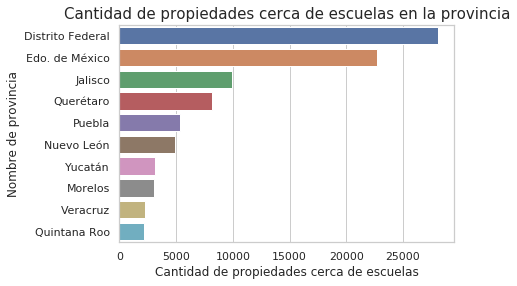

In [14]:
dfagrupadas_provincia = df.groupby('provincia').agg({'escuelascercanas':'sum'}).sort_values(by = ['escuelascercanas'], ascending = False)
dfagrupadas_provincia.reset_index(inplace=True)
dftop10_provincia = dfagrupadas_provincia.head(10)

g = sns.barplot(x=dftop10_provincia.escuelascercanas, y=dftop10_provincia.provincia, palette=sns.color_palette("deep", 10))
g.set_title("Cantidad de propiedades cerca de escuelas en la provincia", fontsize=15)
g.set_xlabel("Cantidad de propiedades cerca de escuelas", fontsize=12)
g.set_ylabel("Nombre de provincia", fontsize=12);

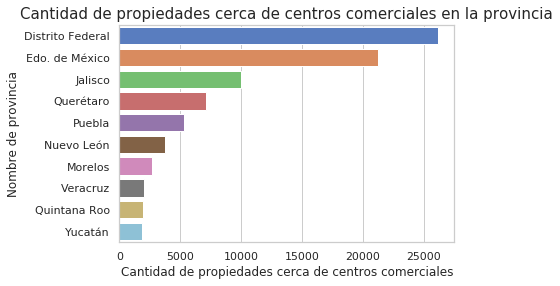

In [15]:
dfagrupadas_provincia = df.groupby('provincia').agg({'centroscomercialescercanos':'sum'}).sort_values(by = ['centroscomercialescercanos'], ascending = False)
dfagrupadas_provincia.reset_index(inplace=True)
dftop10_provincia = dfagrupadas_provincia.head(10)

g = sns.barplot(x=dftop10_provincia.centroscomercialescercanos, y=dftop10_provincia.provincia, palette=sns.color_palette("muted", 10))
g.set_title("Cantidad de propiedades cerca de centros comerciales en la provincia", fontsize=15)
g.set_xlabel("Cantidad de propiedades cerca de centros comerciales", fontsize=12)
g.set_ylabel("Nombre de provincia", fontsize=12);

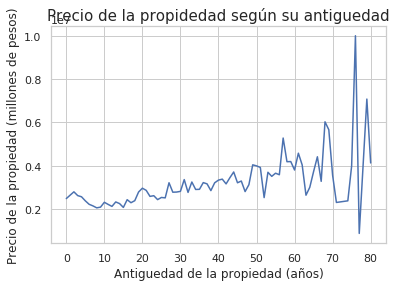

In [18]:
dfcolumnas_antiguedad_nonulas = df.dropna(subset=['antiguedad'])
#dfcolumnas_antiguedad_nonulas.isnull().any()
dfagrupadas_antiguedad_nonulas = df.groupby('antiguedad').agg({'precio':'mean'}).sort_values(by = ['precio'], ascending = False)
dfagrupadas_antiguedad_nonulas.reset_index(inplace=True)
dftop10_antiguedad = dfagrupadas_antiguedad_nonulas.head(10)

g = sns.lineplot(x=dfagrupadas_antiguedad_nonulas.antiguedad, y=dfagrupadas_antiguedad_nonulas.precio,)
g.set_title("Precio de la propidedad según su antiguedad", fontsize=15)
g.set_xlabel("Antiguedad de la propiedad (años)", fontsize=12)
g.set_ylabel("Precio de la propiedad (millones de pesos)", fontsize=12);

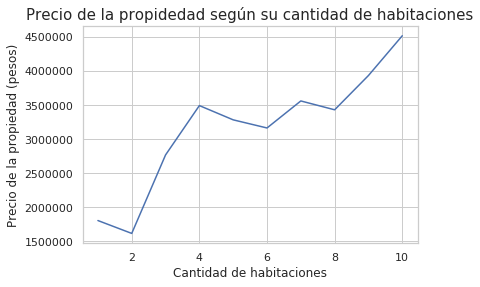

In [19]:
dfcolumnas_habitaciones_nonulas = df.dropna(subset=['habitaciones'])
#dfcolumnas_antiguedad_nonulas.isnull().any()
dfagrupadas_habitaciones_nonulas = df.groupby('habitaciones').agg({'precio':'mean'}).sort_values(by = ['precio'], ascending = False)
dfagrupadas_habitaciones_nonulas.reset_index(inplace=True)
#dftop10_habitaciones = dfagrupadas_habitaciones_nonulas.head(10)

g = sns.lineplot(x=dfagrupadas_habitaciones_nonulas.habitaciones, y=dfagrupadas_habitaciones_nonulas.precio,)
g.set_title("Precio de la propidedad según su cantidad de habitaciones", fontsize=15)
g.set_xlabel("Cantidad de habitaciones", fontsize=12)
g.set_ylabel("Precio de la propiedad (pesos)", fontsize=12);

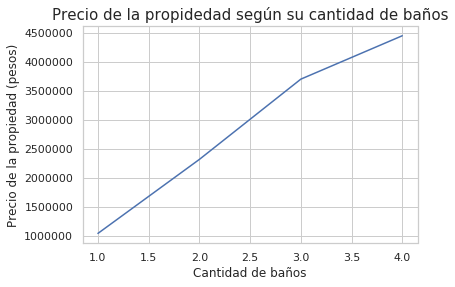

In [20]:
dfcolumnas_banos_nonulas = df.dropna(subset=['banos'])
#dfcolumnas_banos_nonulas.isnull().any()
dfagrupadas_banos_nonulas = df.groupby('banos').agg({'precio':'mean'}).sort_values(by = ['precio'], ascending = False)
dfagrupadas_banos_nonulas.reset_index(inplace=True)
#dftop10_banos = dfagrupadas_banos_nonulas.head(10)

g = sns.lineplot(x=dfagrupadas_banos_nonulas.banos, y=dfagrupadas_banos_nonulas.precio)
g.set_title("Precio de la propidedad según su cantidad de baños", fontsize=15)
g.set_xlabel("Cantidad de baños", fontsize=12)
g.set_ylabel("Precio de la propiedad (pesos)", fontsize=12);

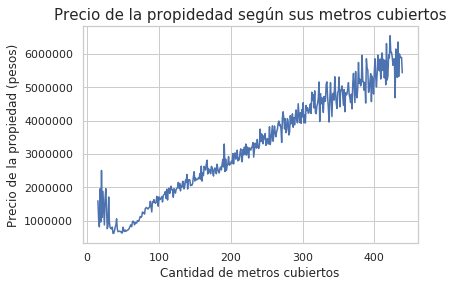

In [21]:
dfcolumnas_metroscubiertos_nonulas = df.dropna(subset=['metroscubiertos'])
#dfcolumnas_metroscubiertos_nonulas.isnull().any()
dfagrupadas_metroscubiertos_nonulas = df.groupby('metroscubiertos').agg({'precio':'mean'}).sort_values(by = ['precio'], ascending = False)
dfagrupadas_metroscubiertos_nonulas.reset_index(inplace=True)
#dftop10_banos = dfagrupadas_metroscubiertos_nonulas.head(10)

g = sns.lineplot(x=dfagrupadas_metroscubiertos_nonulas.metroscubiertos, y=dfagrupadas_metroscubiertos_nonulas.precio,)
g.set_title("Precio de la propidedad según sus metros cubiertos", fontsize=15)
g.set_xlabel("Cantidad de metros cubiertos", fontsize=12)
g.set_ylabel("Precio de la propiedad (pesos)", fontsize=12);